# Multiple linear regression excercises

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \beta_{2} X_{i} + \beta_{3} X_{i} + \epsilon_{i}$

- $Y_{i}$: the dependent (random) variable 
- $X_{i}$: independent variable (not random)
- $\beta_{0}, \beta_{1}...$: model parameters 
- $\epsilon_{i}$: Random error, how the observation deviates from the population mean

In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## Task 1
Use LinearRegression from SciPy to predict global signal from 3 rotations and 3 translation parameters. Which motion parameter has highest beta value?

In [2]:
# Load confounds table
confounds_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, delimiter="\t")

# Print confounds column names
confounds.columns

Index(['csf', 'csf_derivative1', 'csf_power2', 'csf_derivative1_power2',
       'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       'global_signal', 'global_signal_derivative1',
       ...
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=178)

In [3]:
# Filter dataframe to store only 6 motion parameters
motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]

# Filter dataframe to store global signal
global_signal = confounds[["global_signal"]] 

In [4]:
# Fit multiple linear regression model 
linear_regression = LinearRegression()
linear_regression.fit(motion, global_signal)
print(linear_regression.coef_, linear_regression.intercept_)

[[  -11.12573944    -2.92628293   -12.82090256 -1285.13488422
   -139.39206312   721.33740063]] [522.10374583]


## Task 2
Use LinearRegression from SciPy to predict harry potter from other book characters. Which character has highest beta value?

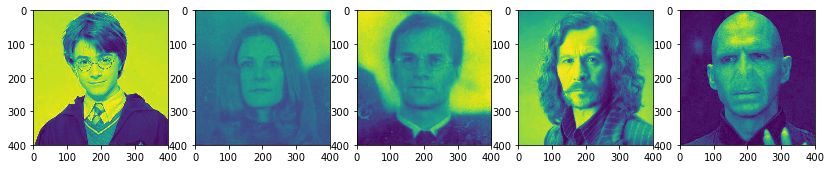

In [17]:
# Load characters

harry = np.load("../data/harry.npy")
lilly = np.load("../data/lilly.npy")
james = np.load("../data/james.npy")
syrius = np.load("../data/syrius.npy")
voldemort = np.load("../data/voldemort.npy")

# Plot photos of all character on one plot
characters = [harry, lilly, james, syrius, voldemort]
fig, ax = plt.subplots(1,5, figsize = (14,25))

for i in range(len(characters)):
    ax[i].imshow(characters[i])

In [30]:
# Make matrix of characters (remember to change matrices to vectors and transpose). Use np.vstack.
characters_matrix = []
for char in characters:
    characters_matrix.append(char.flatten())

characters_matrix = np.array(characters_matrix)

# Print shape of matrix
print(characters_matrix.shape)

# Transpose matrix
characters_matrix_trans = characters_matrix.T

# Print shape of matrix
print(characters_matrix_trans.shape)

(5, 160000)
(160000, 5)


In [33]:
# Run multiple linear regression

linear_regression = LinearRegression()
linear_regression.fit(characters_matrix_trans[:,1:], characters_matrix_trans[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# Print regression coefficients
betas = linear_regression.coef_
intercept = linear_regression.intercept_
print(betas, intercept)

[ 0.30350441  0.83204686  0.2543541  -0.08258658] -24.623800270865956


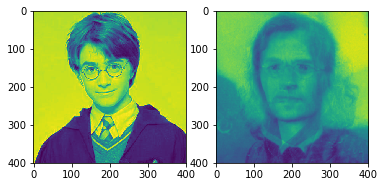

In [41]:
# Print predicted harry
predicted_harry = betas[0]*lilly + betas[1]*james + betas[2]*syrius + betas[3]* voldemort + intercept

fig, ax = plt.subplots(1,2)
ax[0].imshow(harry)
ax[1].imshow(predicted_harry)